Monthly Email Trends

C:\Users\batur\AppData\Local\Temp\ipykernel_21176\796498027.py:34: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\batur\AppData\Local\Temp\ipykernel_21176\796498027.py:50: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Month'] = df['Date'].dt.to_period('M')  # Extract the year-month as a Period object


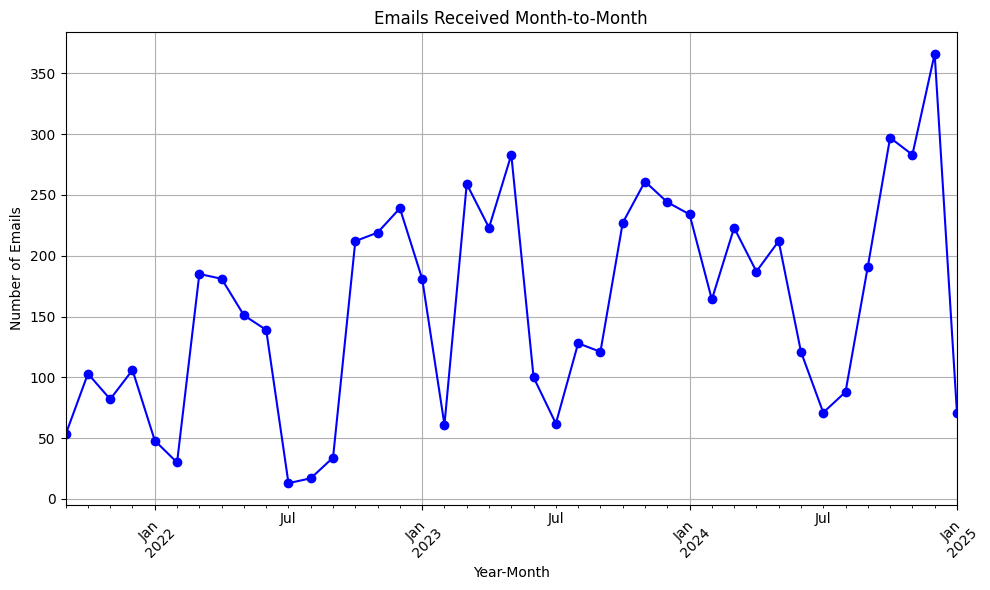

In [56]:
import mailbox
import pandas as pd
import matplotlib.pyplot as plt

# Load the .mbox file
mbox_file = "Spam ve Çöp Kutusu dahil tüm postalar.mbox"  # Replace with your actual file path
mbox = mailbox.mbox(mbox_file)

# Initialize lists to hold email information
data = []

# Process each message in the .mbox file
for message in mbox:
    subject = message['subject']
    sender = message['from']
    recipients = message['to']
    date = message['date']
    # Extract email body (decode if necessary)
    if message.is_multipart():
        body = ""
        for part in message.walk():
            if part.get_content_type() == 'text/plain':
                body += part.get_payload(decode=True).decode(errors='ignore')
    else:
        body = message.get_payload(decode=True).decode(errors='ignore')
    
    # Append email information to the data list
    data.append([subject, sender, recipients, date, body])

# Create DataFrame from the data list
df = pd.DataFrame(data, columns=['Subject', 'Sender', 'Recipients', 'Date', 'Body'])

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with missing or invalid dates
df = df.dropna(subset=['Date'])

# Sort by Date in ascending order
df = df.sort_values(by='Date').reset_index(drop=True)

# Step 1: Convert 'Date' to datetime and handle timezone
# We will handle timezone-aware dates and convert them to timezone-naive
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', utc=True)  # Convert to UTC timezone

# Step 3: Drop rows with missing or invalid dates (NaT)
df = df.dropna(subset=['Date']).reset_index(drop=True)  # Remove rows with NaT in 'Date'

# Step 4: Ensure the Date column is valid and then create the 'Month' column
df['Month'] = df['Date'].dt.to_period('M')  # Extract the year-month as a Period object

# Step 5: Group by 'Month' and count the number of emails
email_trends = df.groupby('Month').size()

# Step 6: Plot the data
plt.figure(figsize=(10, 6))
email_trends.plot(kind='line', marker='o', color='blue')  # Line plot with markers
plt.title("Emails Received Month-to-Month")
plt.xlabel("Year-Month")
plt.ylabel("Number of Emails")
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Most Active Senders:

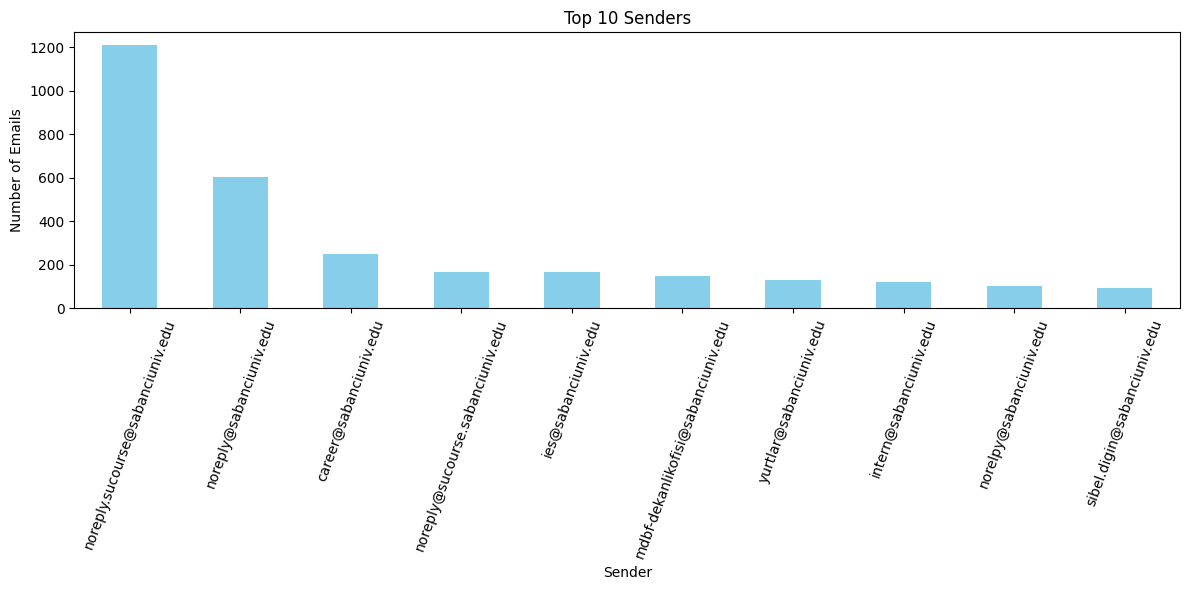

In [3]:
import re
import matplotlib.pyplot as plt

# Function to extract email addresses
def extract_email(address):
    match = re.search(r'[\w\.-]+@[\w\.-]+', str(address))
    return match.group(0) if match else None

# Apply to the Sender and Recipients columns
df['Sender'] = df['Sender'].apply(extract_email)
df['Recipients'] = df['Recipients'].apply(extract_email)

# Replace with your actual email address
my_email = "baturalp.terzi@sabanciuniv.edu"

# Filter out emails where you are the sender
filtered_df = df[df['Sender'] != my_email]

# Count top senders
top_senders = filtered_df['Sender'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
top_senders.plot(kind='bar', color='skyblue')
plt.title("Top 10 Senders")
plt.xlabel("Sender")
plt.ylabel("Number of Emails")
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()


Most Common Subjects

C:\Users\batur\AppData\Local\Temp\ipykernel_21176\567991697.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


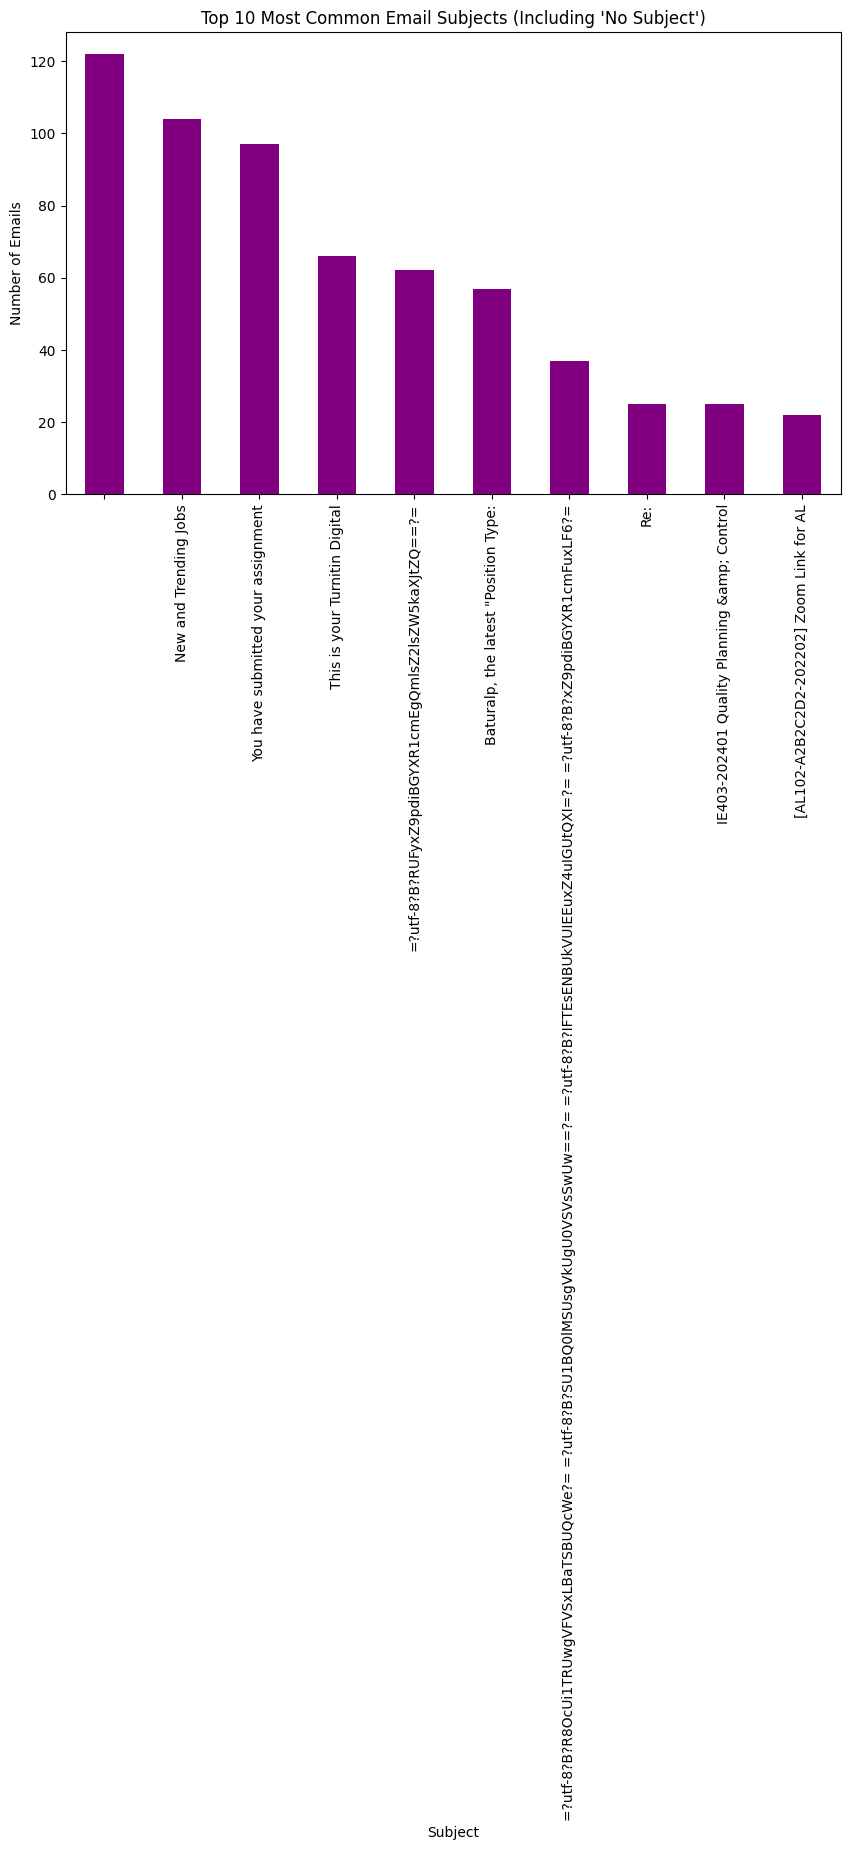

In [4]:
# Step 1: Handle missing or empty subjects
df['Subject_Snippet'] = df['Subject'].apply(lambda x: ' '.join(str(x).split()[:5]) if pd.notnull(x) else 'No Subject')

# Step 2: Find the most common subjects (including 'No Subject')
subject_counts = df['Subject_Snippet'].value_counts()


# Step 3: Plot the top 10 most common subjects
plt.figure(figsize=(10, 6))
subject_counts.head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Most Common Email Subjects (Including 'No Subject')")
plt.xlabel("Subject")
plt.ylabel("Number of Emails")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Emails by Day of Week

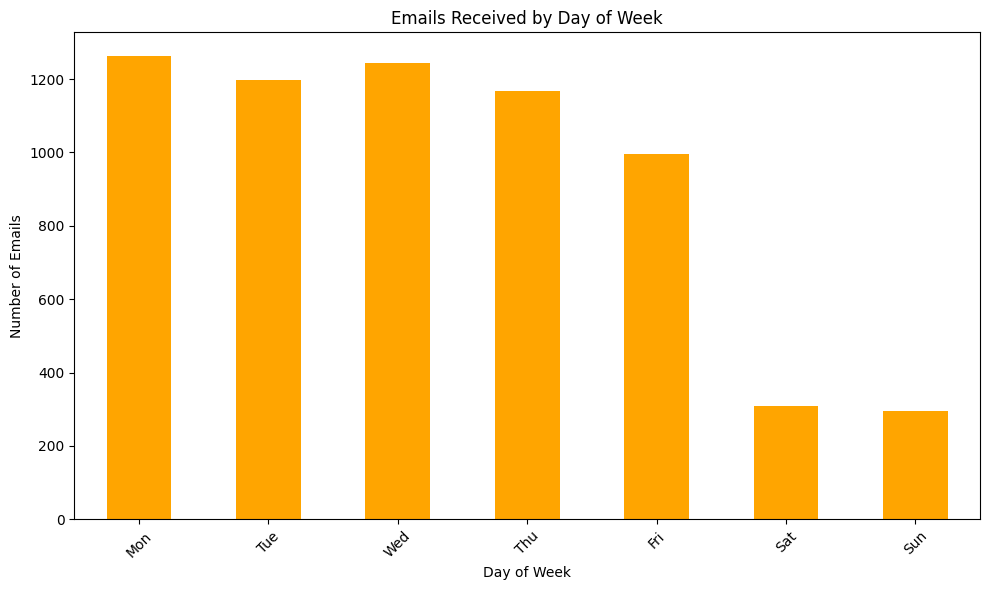

In [5]:
# Step 1: Add a 'DayOfWeek' column (0=Monday, 6=Sunday)
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Step 2: Count the emails for each day of the week
day_of_week_counts = df['DayOfWeek'].value_counts().sort_index()

# Step 3: Plot the emails by day of the week
plt.figure(figsize=(10, 6))
day_of_week_counts.plot(kind='bar', color='orange')
plt.title("Emails Received by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Emails")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], rotation=45)
plt.tight_layout()
plt.show()


Emails by Time of Day

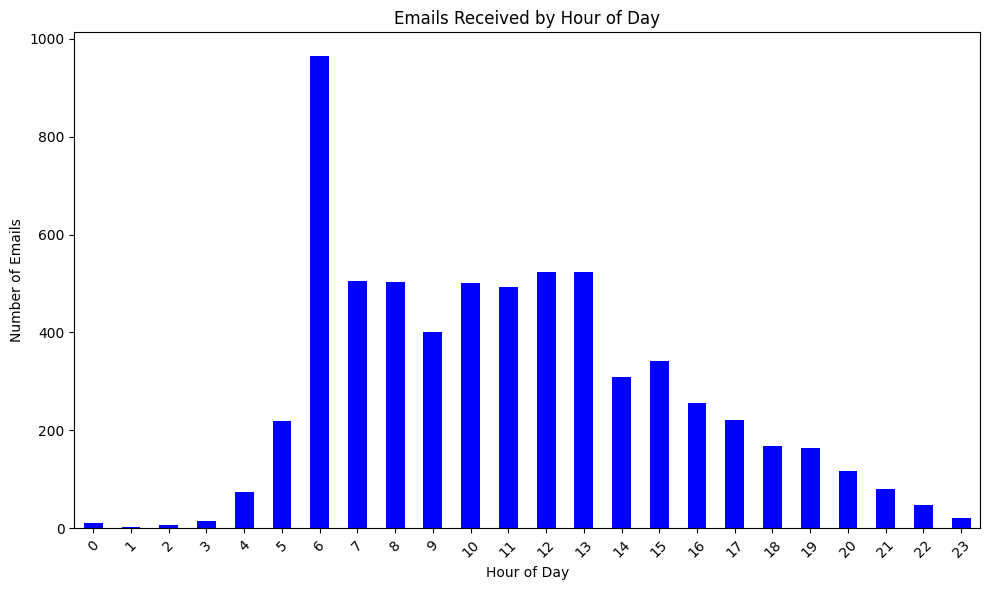

In [6]:
# Step 1: Extract the hour from the Date column
df['Hour'] = df['Date'].dt.hour

# Step 2: Count the emails by hour
hour_counts = df['Hour'].value_counts().sort_index()

# Step 3: Plot the emails by hour of the day
plt.figure(figsize=(10, 6))
hour_counts.plot(kind='bar', color='blue')
plt.title("Emails Received by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Emails")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Time of Day Segments

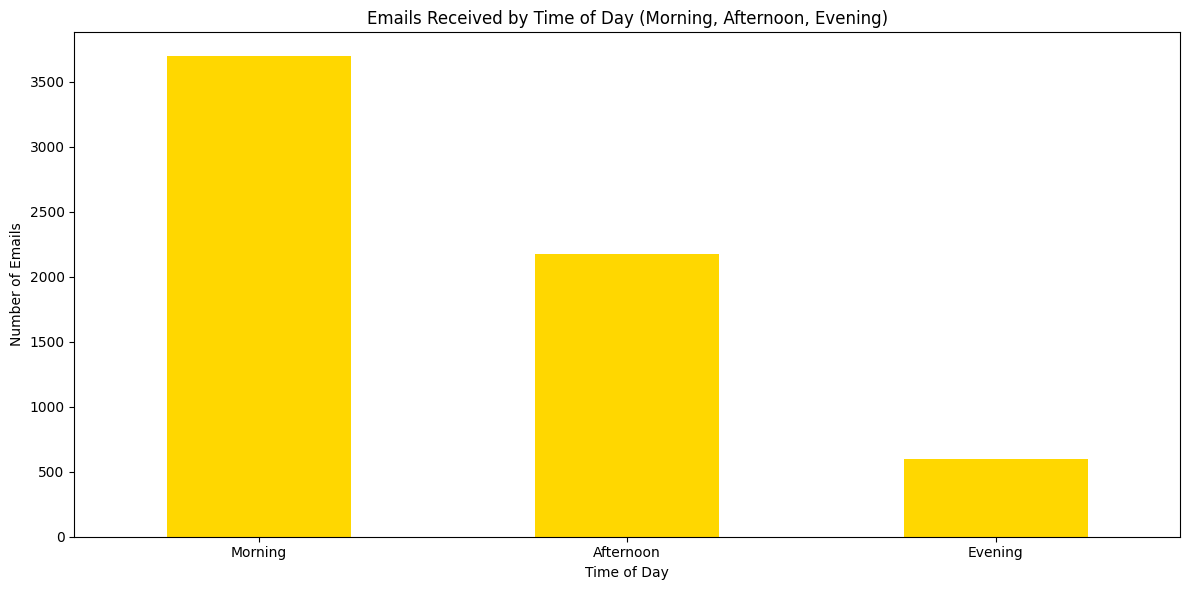

In [7]:
# Step 1: Create a 'TimeSegment' based on hour ranges
def categorize_time_of_day(hour):
    if 0 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply the function to classify emails into time segments
df['TimeSegment'] = df['Date'].dt.hour.apply(categorize_time_of_day)

# Step 2: Count emails by Time Segment
time_segment_counts = df['TimeSegment'].value_counts()

# Step 3: Plot the Time Segment analysis
plt.figure(figsize=(12, 6))
time_segment_counts.plot(kind='bar', color='gold')
plt.title("Emails Received by Time of Day (Morning, Afternoon, Evening)")
plt.xlabel("Time of Day")
plt.ylabel("Number of Emails")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Heatmap of Email Activity by Day of Week and Month

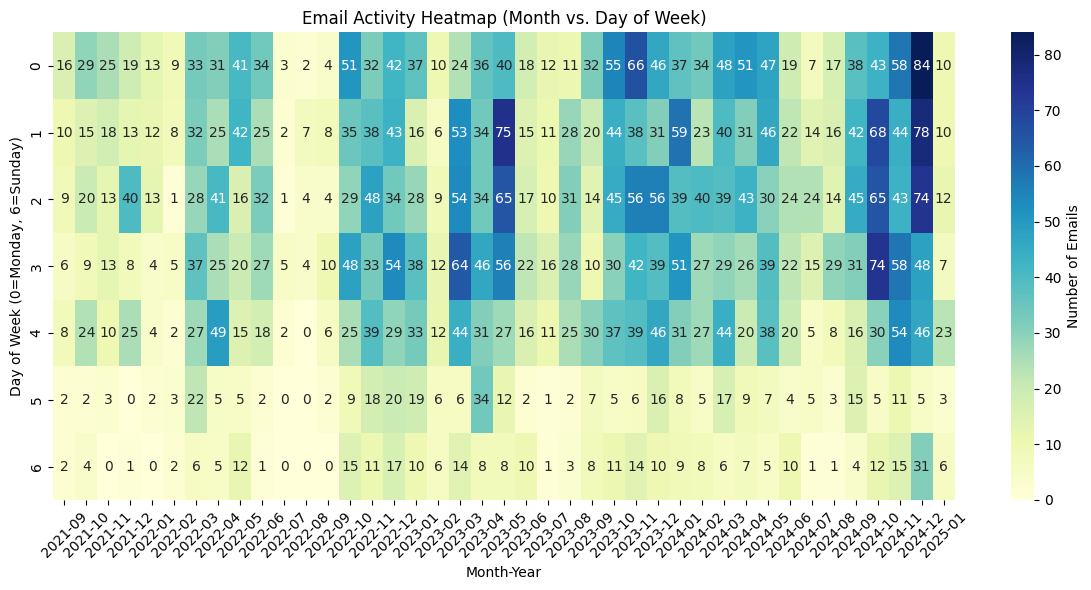

In [8]:
# Create a column for Day of Week (0=Monday, 6=Sunday)
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Create a pivot table with DayOfWeek and Month
heatmap_data_month_day = df.pivot_table(index='DayOfWeek', columns='Month', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_month_day, cmap="YlGnBu", annot=True, fmt="d", cbar_kws={'label': 'Number of Emails'})
plt.title("Email Activity Heatmap (Month vs. Day of Week)")
plt.xlabel("Month-Year")
plt.ylabel("Day of Week (0=Monday, 6=Sunday)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Find the most frequent recipients

C:\Users\batur\AppData\Local\Temp\ipykernel_21176\4091356667.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_emails_df['Recipients'] = sent_emails_df['Recipients'].str.split(',')


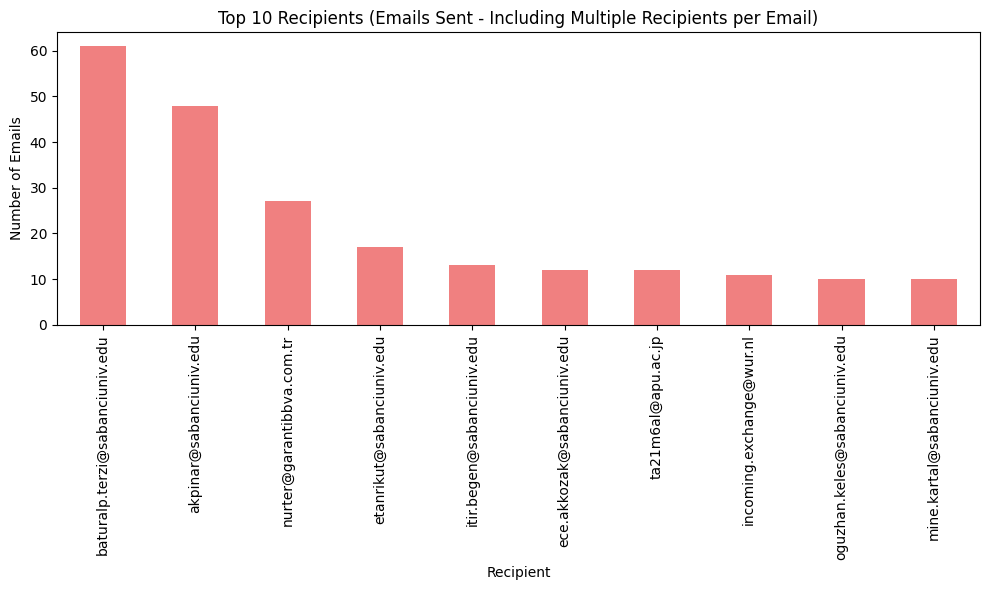

In [11]:
# Filter the DataFrame for emails you sent (where you are the sender)
sent_emails_df = df[df['Sender'] == my_email]

# Count the number of emails sent to each recipient
sent_recipient_count = sent_emails_df['Recipients'].value_counts().head(10)

# If there are multiple recipients, we need to split them and count each one
sent_emails_df['Recipients'] = sent_emails_df['Recipients'].str.split(',')

# Flatten the list of recipients and count their occurrences
recipient_list = sent_emails_df['Recipients'].explode()
sent_recipient_count = recipient_list.value_counts().head(10)

# Plot again with updated counts
plt.figure(figsize=(10, 6))
sent_recipient_count.plot(kind='bar', color='lightcoral')
plt.title("Top 10 Recipients (Emails Sent - Including Multiple Recipients per Email)")
plt.xlabel("Recipient")
plt.ylabel("Number of Emails")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Email Length Variations

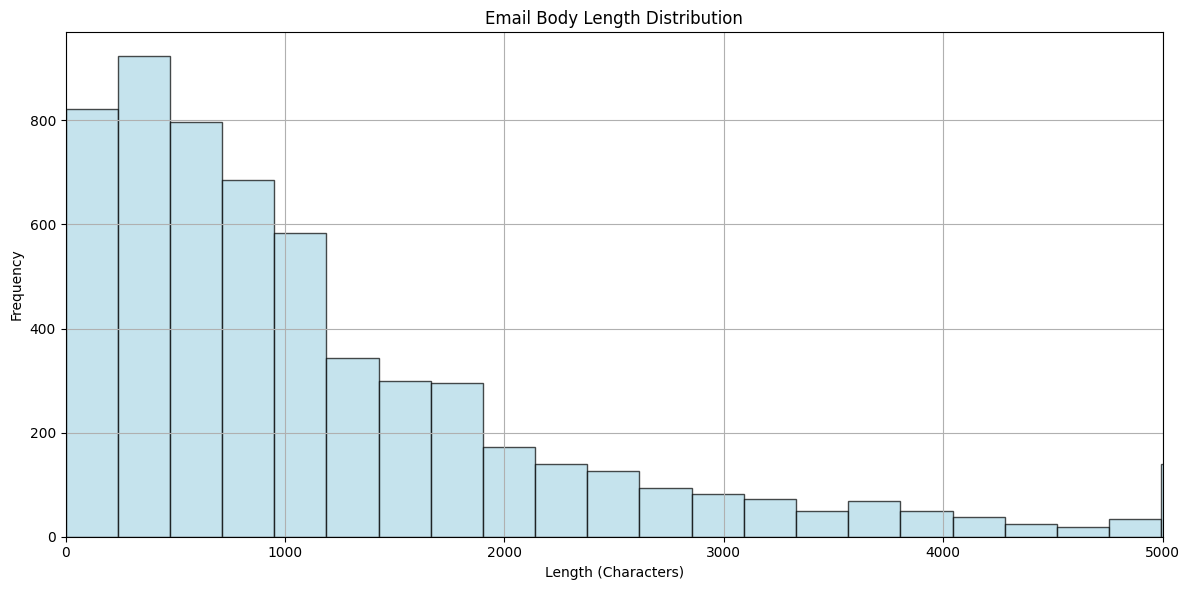

In [36]:
# Step 1: Calculate the length of the email body
df['Body Length'] = df['Body'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# Step 2: Plot the histogram for 'Body Length'
plt.figure(figsize=(12, 6))

# Plot the histogram for 'Body Length' with a limit on the x-axis
plt.hist(df['Body Length'], bins=1000, color='lightblue', edgecolor='black', alpha=0.7)

# Title and labels
plt.title("Email Body Length Distribution")
plt.xlabel("Length (Characters)")
plt.ylabel("Frequency")

# Set x-axis limit to range from 0 to 5000
plt.xlim(0, 5000)

# Grid for better readability
plt.grid(True)

# Adjust layout for tight fit
plt.tight_layout()

# Show the plot
plt.show()


Response Time Analysis

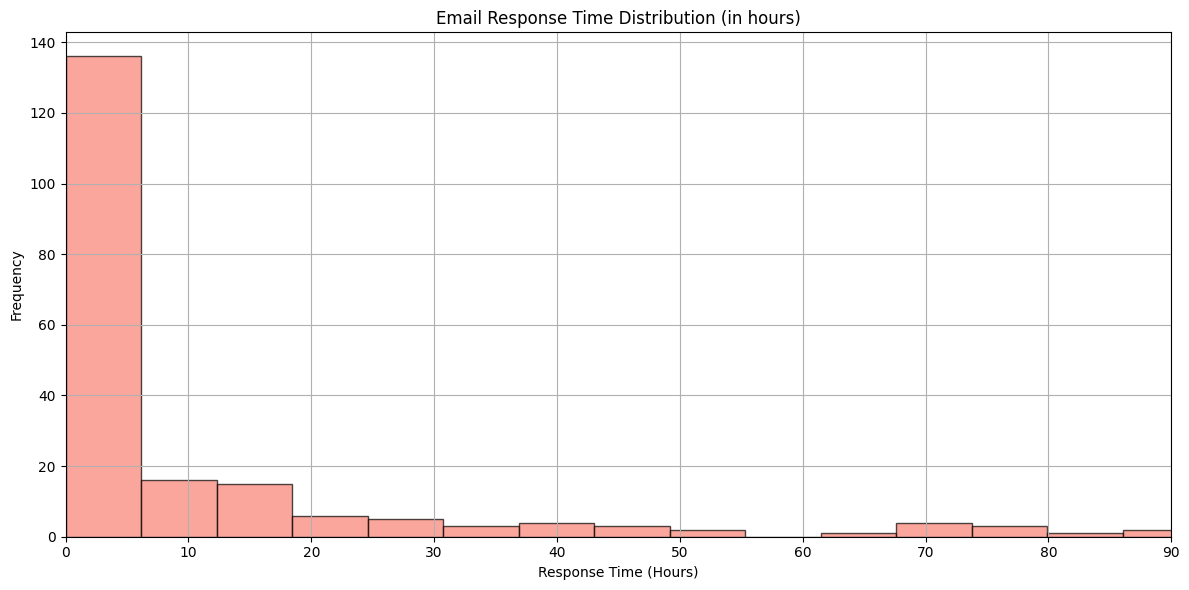

In [18]:
def find_response(row):
    # Check if the subject exists and contains 'Re:' (indicating a response)
    if pd.notnull(row['Subject']) and 'Re:' in row['Subject']:
        # Filter emails with the same subject but later date to find the response
        response = df[(df['Subject'] == row['Subject']) & (df['Date'] > row['Date'])]
        if not response.empty:
            return response['Date'].iloc[0] - row['Date']
    return pd.NaT  # Return NaT if no response is found

# Apply the function to find response times
df['Response Time'] = df.apply(find_response, axis=1)

# Drop rows where there is no response time (NaT)
df_responses = df.dropna(subset=['Response Time'])

# Visualize the response time distribution
plt.figure(figsize=(12, 6))
plt.hist(df_responses['Response Time'].dt.total_seconds() / 3600, bins=2000, color='salmon', edgecolor='black', alpha=0.7)
plt.title("Email Response Time Distribution (in hours)")
plt.xlim(0, 90)
plt.xlabel("Response Time (Hours)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\batur\AppData\Local\Temp\ipykernel_21176\4193694788.py:16: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(body, "html.parser")
C:\Users\batur\AppData\Local\Temp\ipykernel_21176\4193694788.py:16: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(body, "html.parser")
d:\Anaconda\envs\DSA201\Lib\html\parser.py:171: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argume

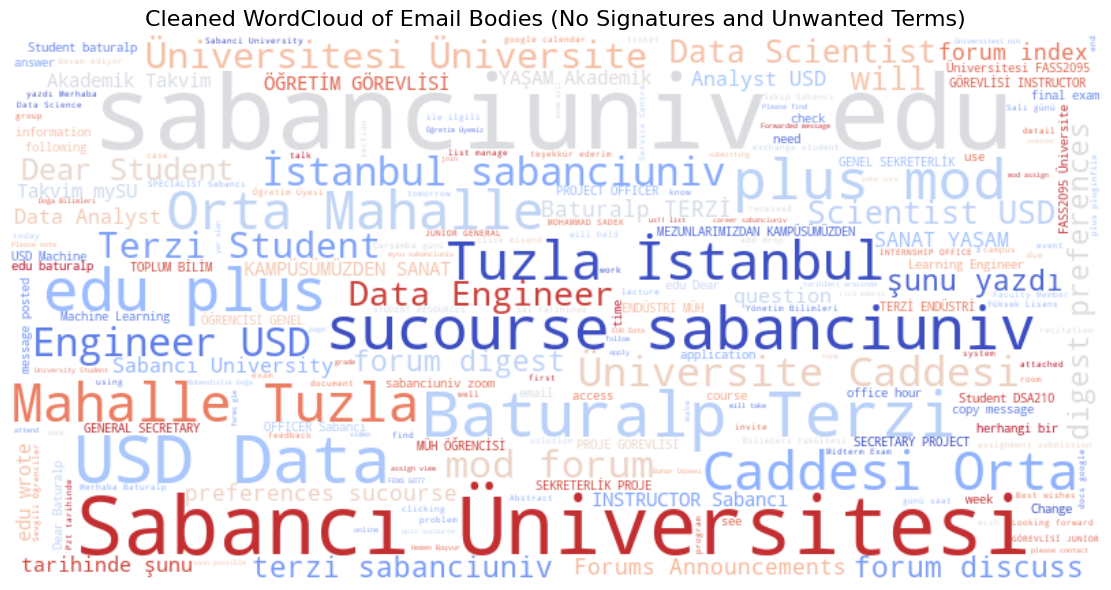

In [19]:
import re
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Custom stopwords to remove unwanted terms
custom_stopwords = [
    "php", "se", "com", "html", "style", "charset", "font", "size", "text", "class", "content", "http", 
    "https", "www", "mailto", "img", "iframe", "subscribe", "footer", "unsubscribe", "base64", "charset", 
    "link", "script", "utf", "div", "span", "xml", "javascript", "alert"
]

# Function to clean email body using BeautifulSoup and remove signatures & unwanted terms
def clean_body(body):
    # Remove HTML tags using BeautifulSoup
    soup = BeautifulSoup(body, "html.parser")
    cleaned_body = soup.get_text()

    # Remove common email signature patterns
    signature_patterns = [
        r'(?i)(--|Best regards|Sincerely|Kind regards|Regards|Thank you|Cheers|Yours sincerely|Yours faithfully|Thanks)',  # common sign-offs
        r'(?i)(unsubscribe|footer|click here)',  # unsubscribe, footer, or "click here" links
    ]
    
    for pattern in signature_patterns:
        cleaned_body = re.sub(pattern, '', cleaned_body)

    # Remove words from custom stopwords list
    for word in custom_stopwords:
        cleaned_body = re.sub(r'\b' + re.escape(word) + r'\b', '', cleaned_body, flags=re.IGNORECASE)

    # Remove short words (optional: remove words with less than 3 characters, e.g., "se", "php")
    cleaned_body = re.sub(r'\b\w{1,2}\b', '', cleaned_body)

    # Remove extra whitespace and newlines
    cleaned_body = re.sub(r'\s+', ' ', cleaned_body).strip()
    
    return cleaned_body

# Apply cleaning to all email bodies
df['Cleaned Body'] = df['Body'].apply(lambda x: clean_body(x) if isinstance(x, str) else '')

# Concatenate all cleaned email bodies into a single text string
all_bodies = ' '.join(df['Cleaned Body'].dropna())  # Drop any NaN bodies

# Generate a word cloud from the cleaned email bodies
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=None,  # Optionally, you can provide your own stopwords list
    max_words=200, 
    colormap='coolwarm'
).generate(all_bodies)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title("Cleaned WordCloud of Email Bodies (No Signatures and Unwanted Terms)", fontsize=16)
plt.tight_layout()
plt.show()


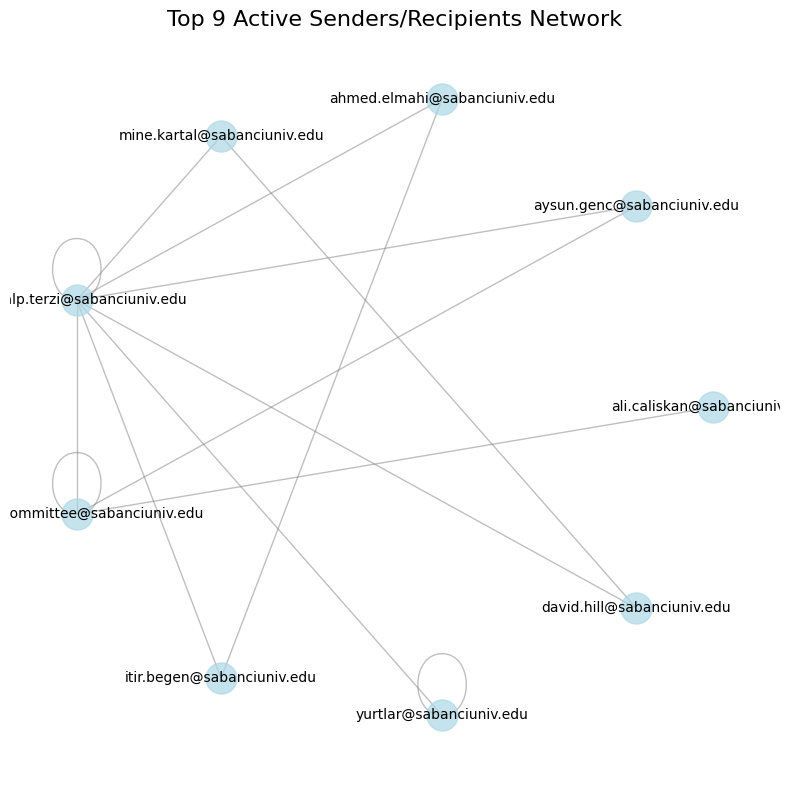

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Set the number of top senders/recipients to visualize
top_n = 9

# Create a graph object
G = nx.Graph()

# Extract sender-recipient pairs from DataFrame
for _, row in df.iterrows():
    sender = row['Sender']
    recipients = row['Recipients'].split(',') if isinstance(row['Recipients'], str) else []
    
    # Add edges between the sender and each recipient
    for recipient in recipients:
        G.add_edge(sender, recipient.strip(), weight=1)  # Add an edge with a weight of 1

# Calculate the degree (connections) for each node
degree = dict(G.degree())

# Get the top N nodes (based on degree or activity)
top_nodes = [node for node, _ in sorted(degree.items(), key=lambda item: item[1], reverse=True)[:top_n]]

# Create a subgraph with just the top N nodes
H = G.subgraph(top_nodes)

# Draw the graph using a circular layout (simpler than spring layout)
plt.figure(figsize=(8, 8))
pos = nx.circular_layout(H)  # Circular layout for simplicity
nx.draw_networkx_nodes(H, pos, node_size=500, node_color='lightblue', alpha=0.7)
nx.draw_networkx_edges(H, pos, width=1.0, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(H, pos, font_size=10, font_color='black')

plt.title(f"Top {top_n} Active Senders/Recipients Network", fontsize=16)
plt.axis('off')  # Hide axis
plt.tight_layout()
plt.show()


C:\Users\batur\AppData\Local\Temp\ipykernel_21176\58713363.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Month'] = df['Date'].dt.to_period('M')
d:\Anaconda\envs\DSA201\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Mean Squared Error: 12892.128353470294


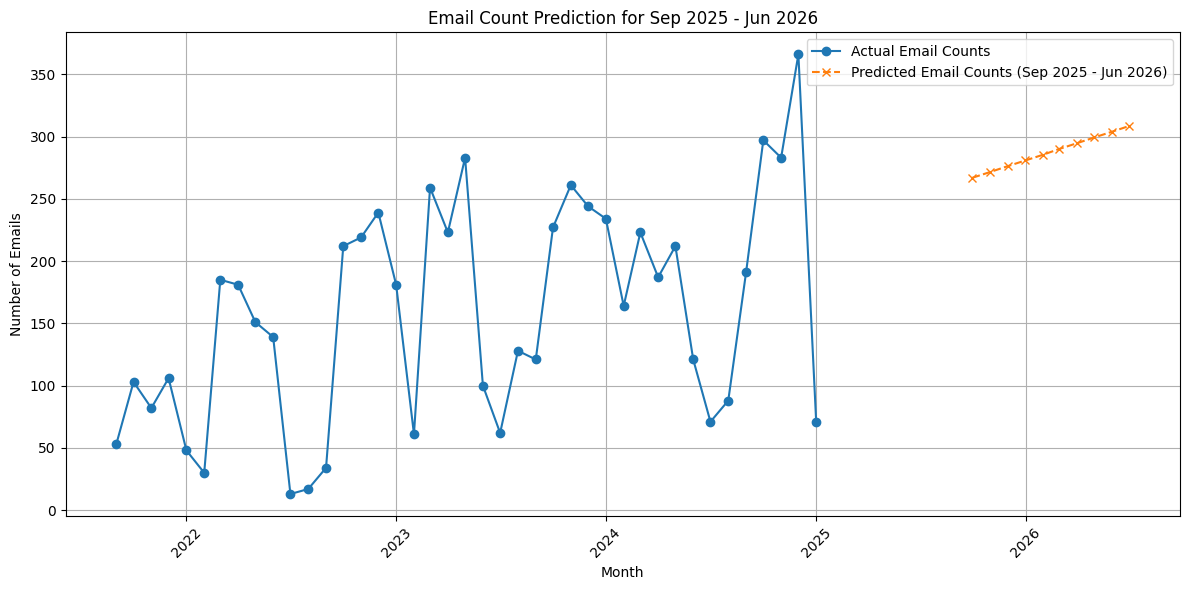

     Month  Predicted_Email_Count
0  2025-09             266.915872
1  2025-10             271.537573
2  2025-11             276.159274
3  2025-12             280.780975
4  2026-01             285.402676
5  2026-02             290.024377
6  2026-03             294.646078
7  2026-04             299.267779
8  2026-05             303.889479
9  2026-06             308.511180


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Prepare the data
df['Month'] = df['Date'].dt.to_period('M')

# Aggregate email counts by month
email_counts = df.groupby('Month').size()

# Convert 'Month' to numerical format (e.g., from the start point)
email_counts = email_counts.reset_index(name='Email_Count')
email_counts['Month_num'] = np.arange(len(email_counts))

# Convert Period to datetime for plotting
email_counts['Month_datetime'] = email_counts['Month'].dt.to_timestamp()

# Step 2: Create the regression model
X = email_counts[['Month_num']]  # Independent variable: month number
y = email_counts['Email_Count']  # Dependent variable: email counts

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Evaluate the model
y_pred = model.predict(X_test)

# Calculate Mean Squared Error to check performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Step 4: Predict email counts for future months (September 2025 to June 2026)
# We need to predict for months from September 2025 (e.g., 2025-09) to June 2026 (2026-06)
future_months = pd.date_range('2025-09-01', '2026-06-01', freq='MS').to_period('M')
future_month_nums = np.arange(len(email_counts), len(email_counts) + len(future_months))

# Predict email counts for these future months
future_X = future_month_nums.reshape(-1, 1)
future_y_pred = model.predict(future_X)

# Create a DataFrame to show the results
future_df = pd.DataFrame({
    'Month': future_months,
    'Predicted_Email_Count': future_y_pred
})

# Step 5: Visualize the predictions
plt.figure(figsize=(12, 6))

# Plot actual email counts using Month_datetime for x-axis
plt.plot(email_counts['Month_datetime'], email_counts['Email_Count'], label='Actual Email Counts', marker='o')

# Plot predicted future email counts
plt.plot(future_df['Month'], future_df['Predicted_Email_Count'], label='Predicted Email Counts (Sep 2025 - Jun 2026)', marker='x', linestyle='--')

plt.title("Email Count Prediction for Sep 2025 - Jun 2026")
plt.xlabel("Month")
plt.ylabel("Number of Emails")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show predicted future email counts
print(future_df)


C:\Users\batur\AppData\Local\Temp\ipykernel_21176\2024831075.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Month'] = df['Date'].dt.to_period('M')


Mean Squared Error: 5999.1187222222225


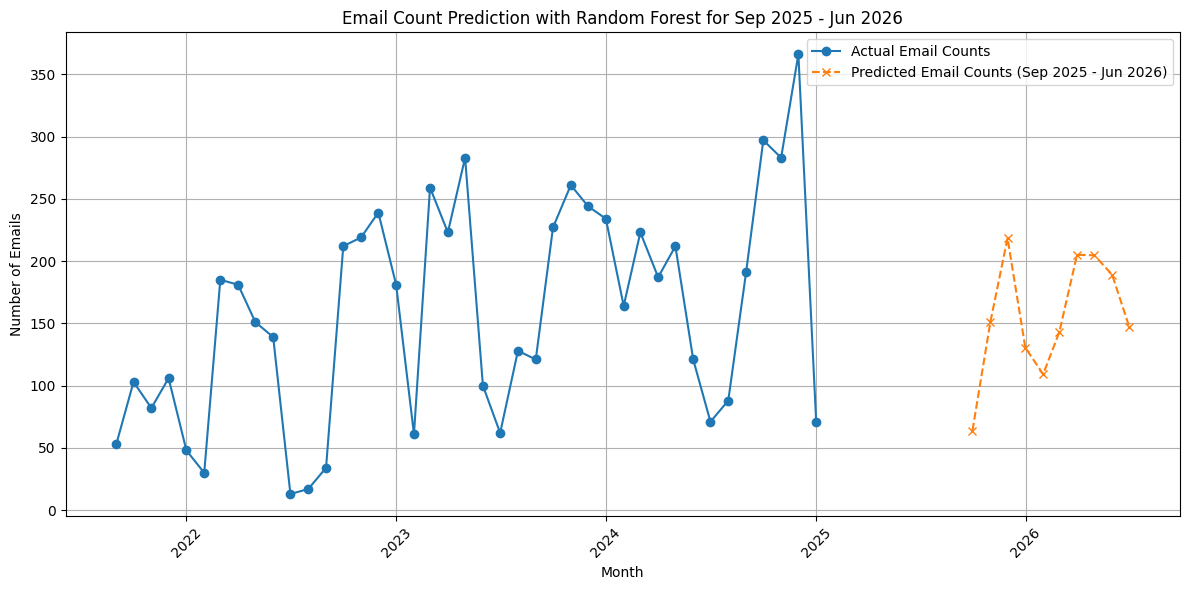

     Month  Predicted_Email_Count
0  2025-09                  63.95
1  2025-10                 150.76
2  2025-11                 218.40
3  2025-12                 130.45
4  2026-01                 109.16
5  2026-02                 142.78
6  2026-03                 205.04
7  2026-04                 204.65
8  2026-05                 189.14
9  2026-06                 146.97


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# Step 1: Prepare the data
df['Month'] = df['Date'].dt.to_period('M')
email_counts = df.groupby('Month').size()

# Convert Period to datetime
email_counts = email_counts.reset_index(name='Email_Count')
email_counts['Month_datetime'] = email_counts['Month'].dt.to_timestamp()

# Add temporal features (month, day of the week, and holiday flag)
email_counts['Month_num'] = email_counts['Month'].dt.month
email_counts['Day_of_week'] = email_counts['Month_datetime'].dt.dayofweek
email_counts['Is_holiday'] = email_counts['Month_num'].apply(lambda x: 1 if x == 7 else 0)  # Example: July as a holiday month

# Step 2: Prepare features and target
X = email_counts[['Month_num', 'Day_of_week', 'Is_holiday']]  # Features
y = email_counts['Email_Count']  # Target

# Step 3: Train a Random Forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error to check performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Step 5: Predict for Future Months (Sep 2025 - Jun 2026)
future_months = pd.date_range('2025-09-01', '2026-06-01', freq='MS').to_period('M')
future_month_nums = future_months.month
future_day_of_week = future_months.to_timestamp().dayofweek

# Convert future_month_nums to a Series before applying the lambda function
future_is_holiday = pd.Series(future_month_nums).apply(lambda x: 1 if x == 7 else 0)

# Prepare the future data
future_data = pd.DataFrame({
    'Month_num': future_month_nums,
    'Day_of_week': future_day_of_week,
    'Is_holiday': future_is_holiday
})

# Step 6: Make predictions for future months
future_predictions = rf_model.predict(future_data)

# Create a DataFrame for predicted future email counts
future_df = pd.DataFrame({
    'Month': future_months,
    'Predicted_Email_Count': future_predictions
})

# Step 7: Visualize the actual vs predicted email counts
plt.figure(figsize=(12, 6))

# Plot actual email counts using Month_datetime for x-axis
plt.plot(email_counts['Month_datetime'], email_counts['Email_Count'], label='Actual Email Counts', marker='o')

# Plot predicted future email counts
plt.plot(future_df['Month'], future_df['Predicted_Email_Count'], label='Predicted Email Counts (Sep 2025 - Jun 2026)', marker='x', linestyle='--')

plt.title("Email Count Prediction with Random Forest for Sep 2025 - Jun 2026")
plt.xlabel("Month")
plt.ylabel("Number of Emails")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show predicted future email counts
print(future_df)


K-Means Clustering

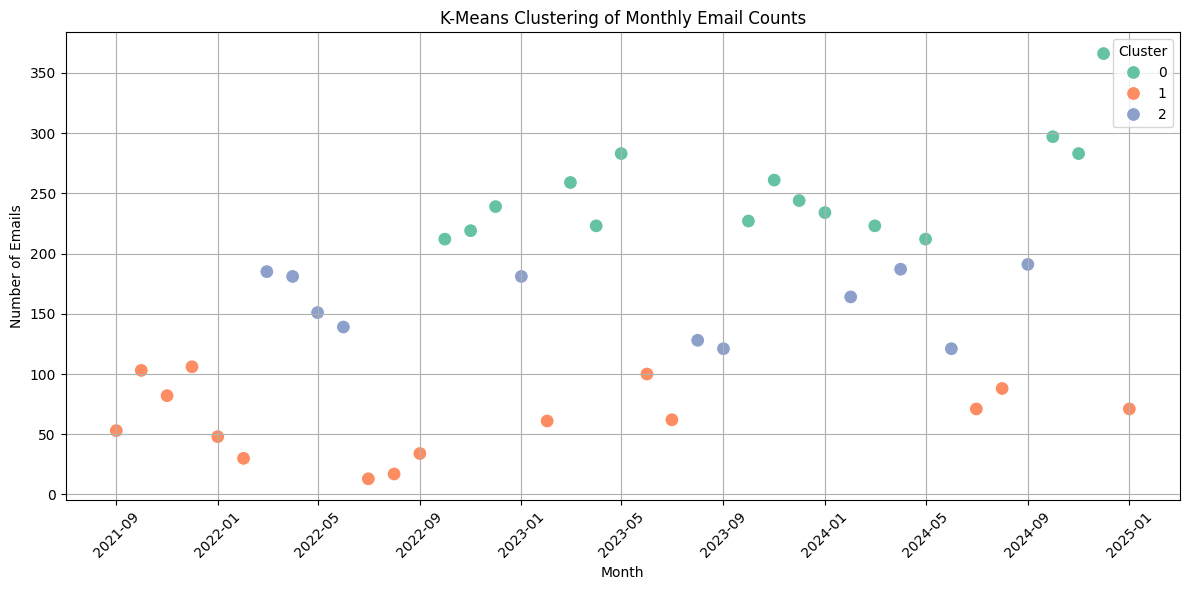

d:\Anaconda\envs\DSA201\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


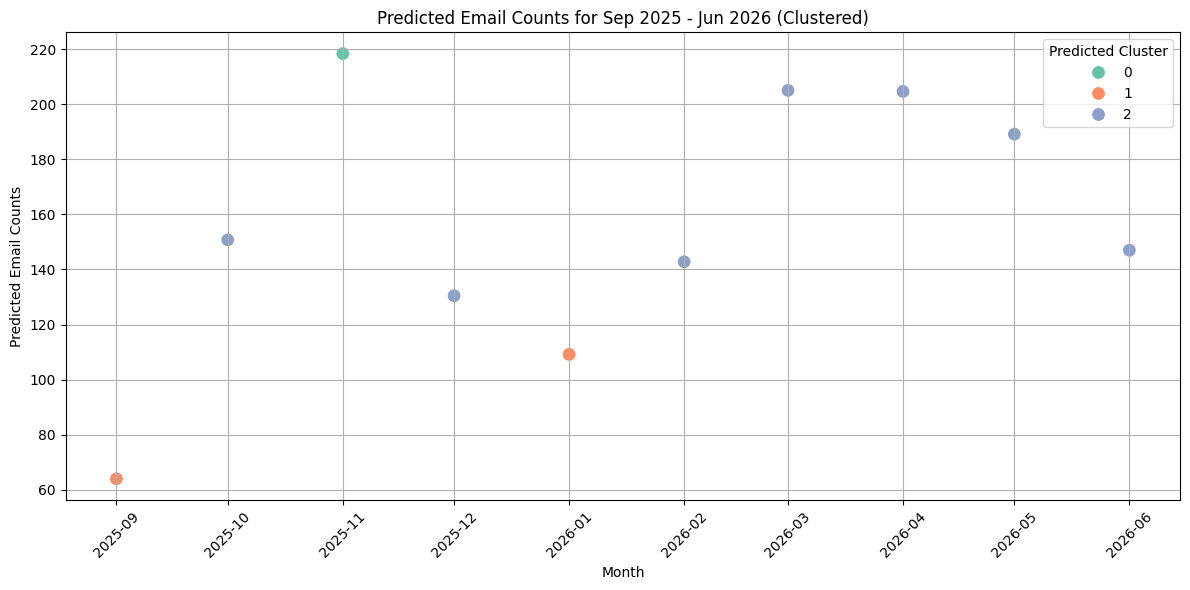

Cluster Assignments for Future Predictions:
   Month_num  Predicted_Cluster
0          9                  1
1         10                  2
2         11                  0
3         12                  2
4          1                  1
5          2                  2
6          3                  2
7          4                  2
8          5                  2
9          6                  2


In [23]:
from sklearn.cluster import KMeans
import seaborn as sns

# Normalize email counts to avoid bias due to scale differences
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
email_counts['Normalized_Email_Count'] = scaler.fit_transform(email_counts[['Email_Count']])

# Step 1: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose 3 clusters for low, medium, high activity
email_counts['Cluster'] = kmeans.fit_predict(email_counts[['Normalized_Email_Count']])

# Step 2: Visualize Clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=email_counts,
    x='Month_datetime',
    y='Email_Count',
    hue='Cluster',
    palette='Set2',
    s=100
)
plt.title("K-Means Clustering of Monthly Email Counts")
plt.xlabel("Month")
plt.ylabel("Number of Emails")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Cluster')
plt.show()

# Step 3: Use Cluster Information to Predict Future Patterns
future_data['Normalized_Email_Count'] = scaler.transform(future_predictions.reshape(-1, 1))
future_data['Predicted_Cluster'] = kmeans.predict(future_data[['Normalized_Email_Count']])

# Visualize future predictions with clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=future_data,
    x=future_months.to_timestamp(),
    y=future_predictions,
    hue='Predicted_Cluster',
    palette='Set2',
    s=100
)
plt.title("Predicted Email Counts for Sep 2025 - Jun 2026 (Clustered)")
plt.xlabel("Month")
plt.ylabel("Predicted Email Counts")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Predicted Cluster')
plt.show()

# Show cluster-level insights
print("Cluster Assignments for Future Predictions:")
print(future_data[['Month_num', 'Predicted_Cluster']])


Sentiment Analysis

C:\Users\batur\AppData\Local\Temp\ipykernel_21176\3368836647.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_emails["Sentiment"] = sent_emails["Body"].apply(analyze_sentiment)
C:\Users\batur\AppData\Local\Temp\ipykernel_21176\3368836647.py:19: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  sent_emails["Month"] = sent_emails["Date"].dt.to_period("M")
C:\Users\batur\AppData\Local\Temp\ipykernel_21176\3368836647.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

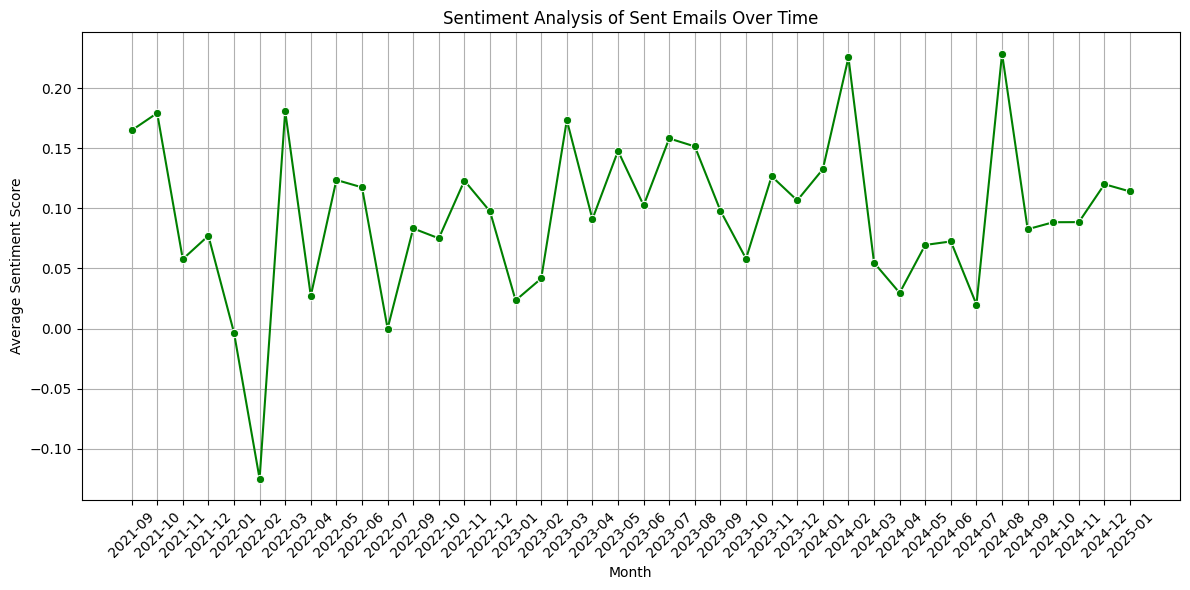

Monthly Sentiment Analysis for Sent Emails:
Month
2021-09    0.164924
2021-10    0.179356
2021-11    0.057793
2021-12    0.077258
2022-01   -0.003384
2022-02   -0.125000
2022-03    0.180953
2022-04    0.027194
2022-05    0.123700
2022-06    0.117520
2022-07    0.000000
2022-09    0.083333
2022-10    0.075103
2022-11    0.123131
2022-12    0.097511
2023-01    0.023460
2023-02    0.041667
2023-03    0.173454
2023-04    0.091053
2023-05    0.147862
2023-06    0.102500
2023-07    0.158238
2023-08    0.151581
2023-09    0.098075
2023-10    0.058145
2023-11    0.126735
2023-12    0.106645
2024-01    0.132616
2024-02    0.225645
2024-03    0.054790
2024-04    0.029688
2024-05    0.069583
2024-06    0.072520
2024-07    0.020000
2024-08    0.228869
2024-09    0.082667
2024-10    0.088504
2024-11    0.088587
2024-12    0.120142
2025-01    0.114082
Freq: M, Name: Sentiment, dtype: float64


In [32]:
from textblob import TextBlob
import seaborn as sns

# Step 1: Filter sent emails
my_email = "baturalp.terzi@sabanciuniv.edu"
sent_emails = df[df["Sender"] == my_email]

# Step 2: Define a function to calculate sentiment
def analyze_sentiment(text):
    if pd.isna(text):  # Handle missing or NaN values
        return 0
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Polarity ranges from -1 (negative) to +1 (positive)

# Step 3: Apply sentiment analysis to email bodies
sent_emails["Sentiment"] = sent_emails["Body"].apply(analyze_sentiment)

# Step 4: Aggregate sentiment scores by month
sent_emails["Month"] = sent_emails["Date"].dt.to_period("M")
monthly_sentiment = sent_emails.groupby("Month")["Sentiment"].mean()

# Step 5: Visualize sentiment over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sentiment.index.astype(str), y=monthly_sentiment.values, marker="o", color="green")
plt.title("Sentiment Analysis of Sent Emails Over Time")
plt.xlabel("Month")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print a summary of sentiments
print("Monthly Sentiment Analysis for Sent Emails:")
print(monthly_sentiment)


Hypothesis 1: The number of emails you receive is higher during weekdays compared to weekends.

In [42]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming df is your DataFrame and 'Date' is already converted to datetime
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6

# Add a new column to categorize weekdays and weekends
df['WeekdayOrWeekend'] = np.where(df['DayOfWeek'] < 5, 'Weekday', 'Weekend')

# Group by 'WeekdayOrWeekend' and count the number of emails for each day
weekday_emails = df[df['WeekdayOrWeekend'] == 'Weekday'].groupby(df['Date'].dt.date).size()
weekend_emails = df[df['WeekdayOrWeekend'] == 'Weekend'].groupby(df['Date'].dt.date).size()

# Perform t-test to compare the number of emails on weekdays vs weekends
# We now compare the number of emails each day for weekdays and weekends
t_stat, p_value = stats.ttest_ind(weekday_emails, weekend_emails)

# Print the result
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpretation of the result
if p_value < 0.05:
    print("We reject the null hypothesis: There is a significant difference between weekdays and weekends.")
else:
    print("We fail to reject the null hypothesis: There is no significant difference between weekdays and weekends.")


T-Statistic: 13.29744878172105
P-Value: 2.5196817485424905e-37
We reject the null hypothesis: There is a significant difference between weekdays and weekends.


Academic_Term
Preparation 1st Term     392
Preparation 2nd Term     684
Freshman 1st Term        883
Freshman 2nd Term        926
Sophomore 1st Term      1078
Sophomore 2nd Term       906
Junior 1st Term         1208
Name: count, dtype: int64


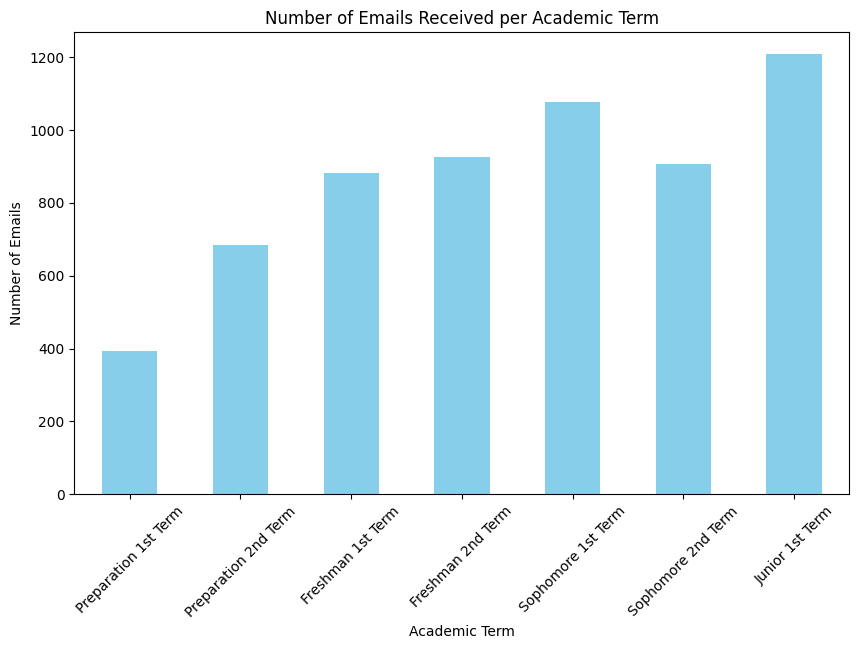

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime and remove timezone info
df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.tz_localize(None)

# Define academic year terms with correct boundaries
def assign_academic_term(date):
    if pd.Timestamp("2021-09-01") <= date <= pd.Timestamp("2022-01-31"):
        return "Preparation 1st Term"
    elif pd.Timestamp("2022-02-01") <= date <= pd.Timestamp("2022-06-30"):
        return "Preparation 2nd Term"
    elif pd.Timestamp("2022-09-01") <= date <= pd.Timestamp("2023-01-31"):
        return "Freshman 1st Term"
    elif pd.Timestamp("2023-02-01") <= date <= pd.Timestamp("2023-06-30"):
        return "Freshman 2nd Term"
    elif pd.Timestamp("2023-09-01") <= date <= pd.Timestamp("2024-01-31"):
        return "Sophomore 1st Term"
    elif pd.Timestamp("2024-02-01") <= date <= pd.Timestamp("2024-06-30"):
        return "Sophomore 2nd Term"
    elif pd.Timestamp("2024-09-01") <= date <= pd.Timestamp("2025-01-31"):
        return "Junior 1st Term"
    else:
        return "Other"

# Apply the function to assign academic terms
df['Academic_Term'] = df['Date'].apply(assign_academic_term)

# Manually order the terms
term_order = [
    "Preparation 1st Term", "Preparation 2nd Term",
    "Freshman 1st Term", "Freshman 2nd Term",
    "Sophomore 1st Term", "Sophomore 2nd Term",
    "Junior 1st Term"
]

# Convert to categorical for correct ordering
df['Academic_Term'] = pd.Categorical(df['Academic_Term'], categories=term_order, ordered=True)

# Count emails received per academic term
term_counts = df['Academic_Term'].value_counts().sort_index()

# Display the counts
print(term_counts)

# Plot the results
plt.figure(figsize=(10, 6))
term_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Emails Received per Academic Term")
plt.xlabel("Academic Term")
plt.ylabel("Number of Emails")
plt.xticks(rotation=45)
plt.show()


Null Hypothesis (H₀): There is no relationship between academic seniority and the number of emails received.
Alternative Hypothesis (H₁): The number of emails increases with academic seniority.

Regression Coefficients:
Intercept: 427.14
Slope: 110.25
R² Score: 0.8005
P-value: 0.0065

Decision: Reject the null hypothesis (H₀).
There is a significant positive relationship between academic seniority and the number of emails received.


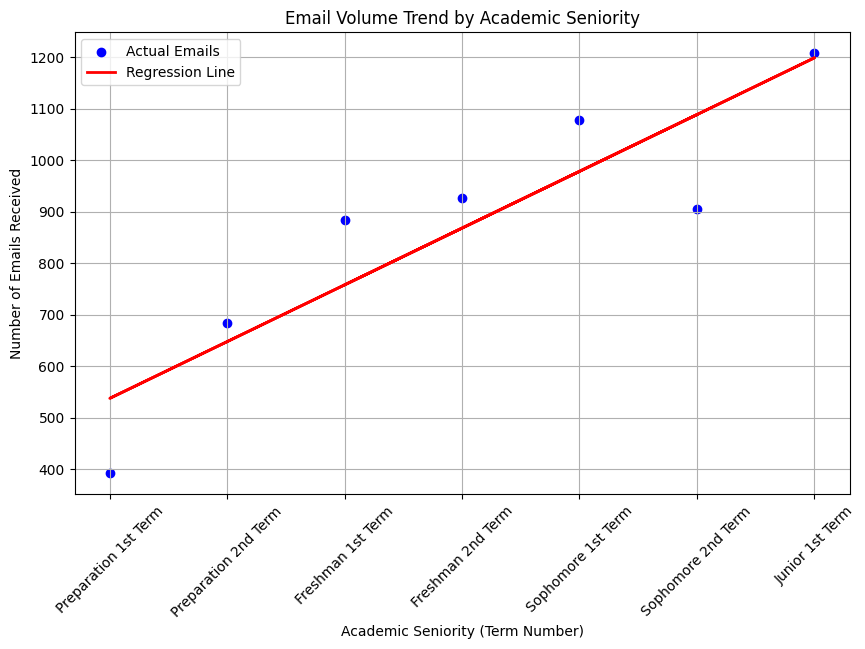

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

# Convert the 'Date' column to datetime and remove timezone info if needed
df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.tz_localize(None)

# Define academic year terms dynamically
def assign_academic_term(date):
    if pd.Timestamp("2021-09-01") <= date <= pd.Timestamp("2022-01-31"):
        return "Preparation 1st Term"
    elif pd.Timestamp("2022-02-01") <= date <= pd.Timestamp("2022-06-30"):
        return "Preparation 2nd Term"
    elif pd.Timestamp("2022-09-01") <= date <= pd.Timestamp("2023-01-31"):
        return "Freshman 1st Term"
    elif pd.Timestamp("2023-02-01") <= date <= pd.Timestamp("2023-06-30"):
        return "Freshman 2nd Term"
    elif pd.Timestamp("2023-09-01") <= date <= pd.Timestamp("2024-01-31"):
        return "Sophomore 1st Term"
    elif pd.Timestamp("2024-02-01") <= date <= pd.Timestamp("2024-06-30"):
        return "Sophomore 2nd Term"
    elif pd.Timestamp("2024-09-01") <= date <= pd.Timestamp("2025-01-31"):
        return "Junior 1st Term"

# Apply the function to assign academic terms
df['Academic_Term'] = df['Date'].apply(assign_academic_term)

# Count emails received per academic term
term_counts = df['Academic_Term'].value_counts().sort_index()

# Create a DataFrame for regression analysis
df_terms = term_counts.reset_index()
df_terms.columns = ['Academic_Term', 'Emails_Received']

# Assign academic seniority values
term_order = [
    "Preparation 1st Term", "Preparation 2nd Term",
    "Freshman 1st Term", "Freshman 2nd Term",
    "Sophomore 1st Term", "Sophomore 2nd Term",
    "Junior 1st Term"
]
df_terms['Seniority'] = df_terms['Academic_Term'].apply(lambda x: term_order.index(x) + 1)

# Prepare data for regression
X = df_terms['Seniority'].values.reshape(-1, 1)
y = df_terms['Emails_Received'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values and calculate R²
y_pred = model.predict(X)
r2_score = model.score(X, y)

# Perform a t-test to check p-value
slope, intercept, r_value, p_value, std_err = stats.linregress(df_terms['Seniority'], df_terms['Emails_Received'])

# Print the regression results
print("Regression Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.2f}")
print(f"R² Score: {r2_score:.4f}")
print(f"P-value: {p_value:.4f}")

# Decision on hypothesis
alpha = 0.05
if p_value < alpha:
    print("\nDecision: Reject the null hypothesis (H₀).")
    print("There is a significant positive relationship between academic seniority and the number of emails received.")
else:
    print("\nDecision: Fail to reject the null hypothesis (H₀).")
    print("There is no significant relationship between academic seniority and the number of emails received.")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(df_terms['Seniority'], df_terms['Emails_Received'], color='blue', label='Actual Emails')
plt.plot(df_terms['Seniority'], y_pred, color='red', linewidth=2, label='Regression Line')
plt.title("Email Volume Trend by Academic Seniority")
plt.xlabel("Academic Seniority (Term Number)")
plt.ylabel("Number of Emails Received")
plt.xticks(df_terms['Seniority'], df_terms['Academic_Term'], rotation=45)
plt.legend()
plt.grid(True)
plt.show()


Hypothesis: Email volume is influenced by the academic workload of each term.
Null Hypothesis (H₀): There is no difference in email volume between the first and second terms of an academic year.
Alternative Hypothesis (H₁): Second terms have a higher volume of emails compared to first terms.

In [84]:
import pandas as pd
from scipy.stats import ttest_ind

# Define function to assign Academic Year and Term
def assign_academic_term(date):
    if pd.Timestamp("2021-09-01") <= date < pd.Timestamp("2022-02-01"):
        return "Preparation Term 1"
    elif pd.Timestamp("2022-02-01") <= date < pd.Timestamp("2022-07-01"):
        return "Preparation Term 2"
    elif pd.Timestamp("2022-09-01") <= date < pd.Timestamp("2023-02-01"):
        return "Freshman Term 1"
    elif pd.Timestamp("2023-02-01") <= date < pd.Timestamp("2023-07-01"):
        return "Freshman Term 2"
    elif pd.Timestamp("2023-09-01") <= date < pd.Timestamp("2024-02-01"):
        return "Sophomore Term 1"
    elif pd.Timestamp("2024-02-01") <= date < pd.Timestamp("2024-07-01"):
        return "Sophomore Term 2"
    else:
        return None  # Exclude emails outside these ranges

# Assign Academic Term to the DataFrame
df['Academic Term'] = df['Date'].apply(assign_academic_term)

# Add a column for email body length
df['Body Length'] = df['Body'].apply(lambda x: len(x) if pd.notnull(x) else 0)

# Group email counts by Academic Term
term_counts = df.groupby('Academic Term').size()
print("Email counts by academic term:")
print(term_counts)

# Separate terms for statistical testing
academic_years = ["Preparation", "Freshman", "Sophomore"]
results = []

for year in academic_years:
    term1 = f"{year} Term 1"
    term2 = f"{year} Term 2"
    
    # Check if both terms exist in the dataset
    if term1 in df['Academic Term'].values and term2 in df['Academic Term'].values:
        term1_emails = df[df['Academic Term'] == term1]['Body Length'].dropna()
        term2_emails = df[df['Academic Term'] == term2]['Body Length'].dropna()
        
        # Perform an independent t-test
        t_stat, p_value = ttest_ind(term1_emails, term2_emails, equal_var=False)
        
        # Append results for this academic year
        results.append({
            "Academic Year": year,
            "Term 1 Emails": len(term1_emails),
            "Term 2 Emails": len(term2_emails),
            "T-Statistic": t_stat,
            "P-Value": p_value
        })

# Display results
print("\nHypothesis Testing Results:")
for res in results:
    print(f"Academic Year: {res['Academic Year']}")
    print(f"  Term 1 Emails: {res['Term 1 Emails']}")
    print(f"  Term 2 Emails: {res['Term 2 Emails']}")
    print(f"  T-Statistic: {res['T-Statistic']}")
    print(f"  P-Value: {res['P-Value']}")
    if res['P-Value'] < 0.05:
        print("  Result: Reject the null hypothesis (H₀)")
    else:
        print("  Result: Fail to reject the null hypothesis (H₀)")


Email counts by academic term:
Academic Term
Freshman Term 1        885
Freshman Term 2        926
Preparation Term 1     392
Preparation Term 2     686
Sophomore Term 1      1087
Sophomore Term 2       907
dtype: int64

Hypothesis Testing Results:
Academic Year: Preparation
  Term 1 Emails: 392
  Term 2 Emails: 686
  T-Statistic: -0.4215147113177915
  P-Value: 0.6734924142121568
  Result: Fail to reject the null hypothesis (H₀)
Academic Year: Freshman
  Term 1 Emails: 885
  Term 2 Emails: 926
  T-Statistic: 0.7749343241180839
  P-Value: 0.43854000937905546
  Result: Fail to reject the null hypothesis (H₀)
Academic Year: Sophomore
  Term 1 Emails: 1087
  Term 2 Emails: 907
  T-Statistic: -2.122670564653315
  P-Value: 0.03396635837325495
  Result: Reject the null hypothesis (H₀)
